## Principal Component Analysis (PCA)

In [1]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/' 'machine-learning-databases/wine/wine.data', header=None)

In [2]:
# Train Test Split
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# Standardize the Features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [73]:
import numpy as np
cov_mat = np.cov(X_train_std.T)                                                  # Covariance Matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)                                  # Eigen Values & Vectors
tot = sum(eigen_vals) 
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]                  # Normalized Eigen
cum_var_exp = np.cumsum(var_exp)                                                 # Cumulative Normalized Eigen


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


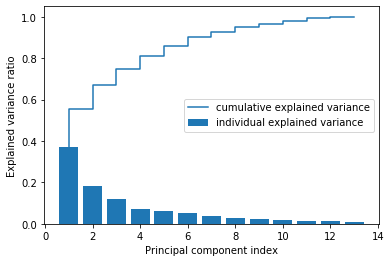

In [77]:
print('\nEigenvalues \n%s' % eigen_vals)

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, label='individual explained variance')#, alpha=0.5, align='center', )
plt.step(range(1,14), cum_var_exp, label='cumulative explained variance')#, where='mid', )
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [91]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [
                (np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))
              ]
eigen_pairs.sort(key=lambda k: k[0], reverse=True) # Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs[1:][1]

(1.5484582488203524,
 array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,
         0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,
         0.05305915,  0.13239103, -0.07065022]))

In [32]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [34]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [35]:
X_train_pca = X_train_std.dot(w)

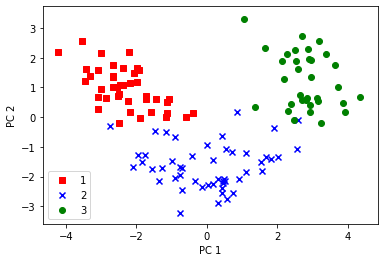

In [93]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
    X_train_pca[y_train==l, 1],
    c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [3]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.6, c=cmap(idx), edgecolor='black',marker=markers[idx],label=cl)

In [148]:
'''
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_
'''

'\npca = PCA(n_components=None)\nX_train_pca = pca.fit_transform(X_train_std)\npca.explained_variance_ratio_\n'

### Linear Discriminant Analysis (LDA)

In [116]:
np.set_printoptions(precision=4)                                                      # set number of decimal places
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))                    # calculate mean for ylabel = 1,2,3
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [117]:
d = 13 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))
for row in X_train_std[y_train == label]:
    row, mv = row.reshape(d, 1), mv.reshape(d, 1)
    class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


In [118]:
print('Class label distribution: %s' % np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


In [119]:
d = 13 # number of features
S_W = np.zeros((d, d))
for label,mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [120]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13 # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1) # make column vector
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot(
    (mean_vec - mean_overall).T)
print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


In [121]:
# generalized eigenvalue problem of the matrix :
eigen_vals, eigen_vecs =np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
# After we computed the eigenpairs, we can now sort the eigenvalues in descending order:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
    for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,
    key=lambda k: k[0], reverse=True)
print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

349.6178089059939
172.76152218979388
3.7853134512521556e-14
2.117398448224407e-14
1.5164618894178885e-14
1.5164618894178885e-14
1.3579567140455979e-14
1.3579567140455979e-14
7.587760371654683e-15
5.906039984472233e-15
5.906039984472233e-15
2.256441978569674e-15
0.0


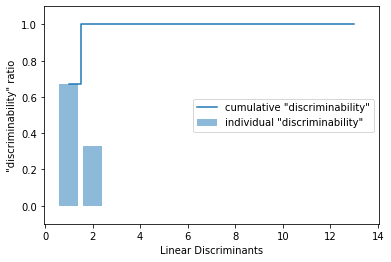

In [122]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
    label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
    label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

In [123]:
# Let's now stack the two most discriminative eigenvector columns to create the transformation matrix W:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
    eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


In [ ]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0],
    X_train_lda[y_train==l, 1] * (-1),
    c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.show()

## PCA in scikit-learn

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

(Text(0.5, 0, 'PC1'),
 Text(0, 0.5, 'PC2'),
 Text(0.5, 1.0, 'X_test_pca'))

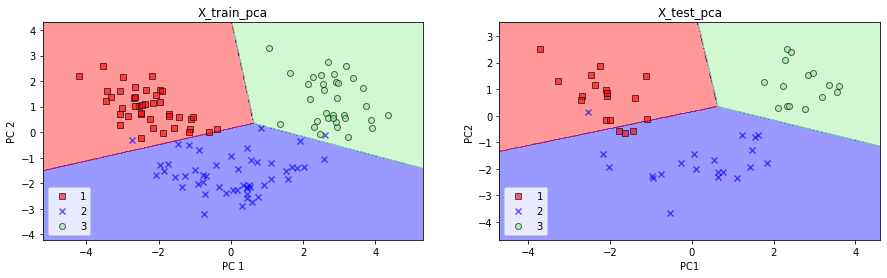

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
# ----------Apply PCA + Logistic Regression -------------
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
# ------------------------------------------------------
plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
plt.subplot(121), plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1'), plt.ylabel('PC 2'), plt.legend(loc='lower left'), plt.title('X_train_pca')
plt.subplot(122), plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1'), plt.ylabel('PC2'), plt.legend(loc='lower left'), plt.title('X_test_pca')

In [10]:
print(np.shape(X_train_std))
print(np.shape(X_train_pca))

(124, 13)
(124, 2)


## LDA via scikit-learn

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

(124, 13)
(124, 2)


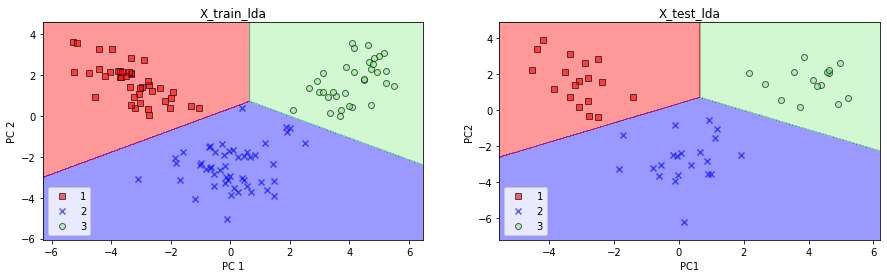

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
plt.subplot(121), plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('PC 1'), plt.ylabel('PC 2'), plt.legend(loc='lower left'), plt.title('X_train_lda')
plt.subplot(122), plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('PC1'), plt.ylabel('PC2'), plt.legend(loc='lower left'), plt.title('X_test_lda')

print(np.shape(X_train_std))
print(np.shape(X_train_lda))

### Kernel Function

In [177]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np
def rbf_kernel_pca(X, gamma, n_components):

    sq_dists = pdist(X, 'sqeuclidean')    # Calculate pairwise squared Euclidean distances in the MxN dimensional dataset.
    mat_sq_dists = squareform(sq_dists)   # Convert pairwise distances into a square matrix.
    K = exp(-gamma * mat_sq_dists)        # Compute the symmetric kernel matrix.

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    # Obtaining eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, i]
    for i in range(n_components)))
    return X_pc

C:\Users\Nida\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  if __name__ == '__main__':
C:\Users\Nida\anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


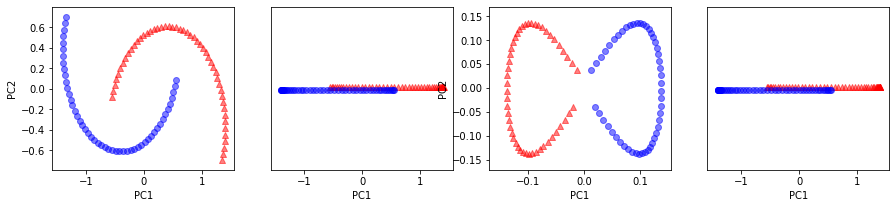

In [185]:
# Exapmple 1: Moon Sets
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1,ncols=4, figsize=(15,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1'), ax[0].set_ylabel('PC2')

ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02,color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02,color='blue', marker='o', alpha=0.5)
ax[1].set_ylim([-1, 1]), ax[1].set_yticks([]), ax[1].set_xlabel('PC1')

ax[2].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],color='red', marker='^', alpha=0.5)
ax[2].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],color='blue', marker='o', alpha=0.5)
ax[2].set_xlabel('PC1'), ax[2].set_ylabel('PC2')

ax[3].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02,color='red', marker='^', alpha=0.5)
ax[3].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02,color='blue', marker='o', alpha=0.5)
ax[3].set_ylim([-1, 1]), ax[3].set_yticks([]), ax[3].set_xlabel('PC1')

plt.show()

C:\Users\Nida\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  if __name__ == '__main__':
C:\Users\Nida\anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


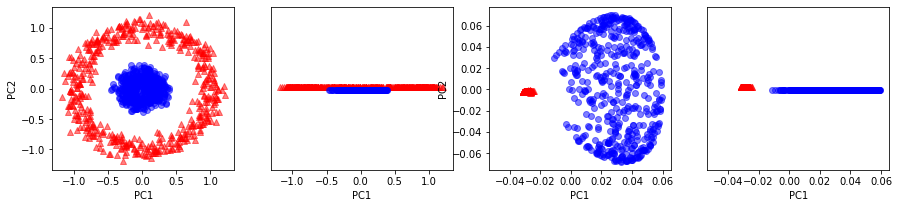

In [184]:
# Example 2 – separating concentric circles
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000,random_state=123, noise=0.1, factor=0.2)
# plt.scatter(X[y==0, 0], X[y==0, 1],color='red', marker='^', alpha=0.5),plt.scatter(X[y==1, 0], X[y==1, 1],color='blue', marker='o', alpha=0.5),plt.show()
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)


fig, ax = plt.subplots(nrows=1,ncols=4, figsize=(15,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')

ax[1].scatter(X_spca[y==0, 0], np.zeros((500,1))+0.02,color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500,1))-0.02,color='blue', marker='o', alpha=0.5)
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

ax[2].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],color='red', marker='^', alpha=0.5)
ax[2].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],color='blue', marker='o', alpha=0.5)
ax[2].set_xlabel('PC1')
ax[2].set_ylabel('PC2')


ax[3].scatter(X_kpca[y==0, 0], np.zeros((500,1))+0.02,color='red', marker='^', alpha=0.5)
ax[3].scatter(X_kpca[y==1, 0], np.zeros((500,1))-0.02,color='blue', marker='o', alpha=0.5)
ax[3].set_ylim([-1, 1])
ax[3].set_yticks([])
ax[3].set_xlabel('PC1')
plt.show()

In [138]:
# Projecting new data points
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np
def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.
    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
    gamma: float
    Tuning parameter of the RBF kernel
    n_components: int
    Number of principal components to return
    Returns
    ------------
    X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
    Projected dataset
    lambdas: list
    Eigenvalues
    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')
    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)
    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)
    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    # Obtaining eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    # Collect the top k eigenvectors (projected samples)
    alphas = np.column_stack((eigvecs[:, i]
    for i in range(n_components)))
    # Collect the corresponding eigenvalues
    lambdas = [eigvals[i] for i in range(n_components)]
    return alphas, lambdas

In [139]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

C:\Users\Nida\anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
C:\Users\Nida\anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [140]:
x_new = X[25]
x_new

x_proj = alphas[25] # original projection
x_proj

def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum(
    (x_new-row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

In [141]:
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj

array([0.0788])

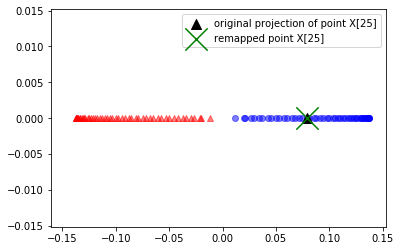

In [142]:
plt.scatter(alphas[y==0, 0], np.zeros((50)),color='red', marker='^',alpha=0.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)),color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black',label='original projection of point X[25]',marker='^', s=100)
plt.scatter(x_reproj, 0, color='green',label='remapped point X[25]',marker='x', s=500)
plt.legend(scatterpoints=1)
plt.show()

## Kernel principal component analysis in scikitlearn

In [143]:
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2,kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

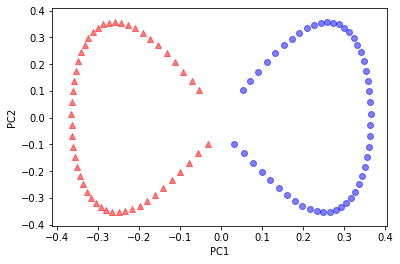

In [144]:
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1],color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1],color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()